In [1]:
import pandas as pd
from core.config import GENERATED_DATA_FOLDER
from core.utils.file_path import solve_path

In [2]:
def open_csv(fname:str, **kwargs)->pd.DataFrame:
    
    fpath = solve_path(fname, GENERATED_DATA_FOLDER)
    
    return pd.read_csv(fpath, **kwargs)

In [3]:
delta = open_csv('delta_area_construida_distrito.csv', sep=';')

In [4]:
delta.head()

,ds_nome,area_construida_vertical_2013,area_construida_vertical_2023,delta_pde
0,AGUA RASA,1622759.0,2108421.0,485662.0
1,ALTO DE PINHEIROS,2065880.0,2243481.0,177601.0
2,ANHANGUERA,0.0,1377.0,1377.0
3,ARICANDUVA,322938.0,640265.0,317327.0
4,ARTUR ALVIM,581546.0,657230.0,75684.0


In [5]:
delta = delta[['ds_nome', 'delta_pde']].copy()

In [6]:
delta.head()

,ds_nome,delta_pde
0,AGUA RASA,485662.0
1,ALTO DE PINHEIROS,177601.0
2,ANHANGUERA,1377.0
3,ARICANDUVA,317327.0
4,ARTUR ALVIM,75684.0


In [7]:
jobs = open_csv('percent_jobs_acessible.csv', sep=';')

In [8]:
jobs.head()

,ds_origem_nome,percent_empregos_destino
0,AGUA RASA,0.369173
1,ALTO DE PINHEIROS,0.563248
2,ANHANGUERA,0.199421
3,ARICANDUVA,0.145392
4,ARTUR ALVIM,0.234090


In [9]:
df = pd.merge(jobs, delta, left_on='ds_origem_nome',
             right_on='ds_nome', how='outer')

In [10]:
df

,ds_origem_nome,percent_empregos_destino,ds_nome,delta_pde
0,AGUA RASA,0.369173,AGUA RASA,485662.0
1,ALTO DE PINHEIROS,0.563248,ALTO DE PINHEIROS,177601.0
2,ANHANGUERA,0.199421,ANHANGUERA,1377.0
3,ARICANDUVA,0.145392,ARICANDUVA,317327.0
4,ARTUR ALVIM,0.234090,ARTUR ALVIM,75684.0
...,...,...,...,...
91,VILA MARIANA,0.757271,VILA MARIANA,1252542.0
92,VILA MATILDE,0.319995,VILA MATILDE,341864.0
93,VILA MEDEIROS,0.188100,VILA MEDEIROS,187435.0
94,VILA PRUDENTE,0.609241,VILA PRUDENTE,706438.0


In [11]:
df.drop('ds_origem_nome', axis=1, inplace=True)

In [12]:
df

,percent_empregos_destino,ds_nome,delta_pde
0,0.369173,AGUA RASA,485662.0
1,0.563248,ALTO DE PINHEIROS,177601.0
2,0.199421,ANHANGUERA,1377.0
3,0.145392,ARICANDUVA,317327.0
4,0.234090,ARTUR ALVIM,75684.0
...,...,...,...
91,0.757271,VILA MARIANA,1252542.0
92,0.319995,VILA MATILDE,341864.0
93,0.188100,VILA MEDEIROS,187435.0
94,0.609241,VILA PRUDENTE,706438.0


In [13]:
import statsmodels.api as sm

/home/h-pgy/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/h-pgy/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [14]:
X = df[['percent_empregos_destino']].copy()
X['const']=1
y = df['delta_pde']

In [15]:
mod = sm.OLS(y, X)
res = mod.fit()

In [16]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              delta_pde   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     39.27
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.11e-08
Time:                        00:27:40   Log-Likelihood:                -1360.4
No. Observations:                  96   AIC:                             2725.
Df Residuals:                      94   BIC:                             2730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
percent_empregos_destino

In [17]:
import matplotlib.pyplot as plt

In [18]:
res.params

percent_empregos_destino    918667.522723
const                       152179.171732
dtype: float64

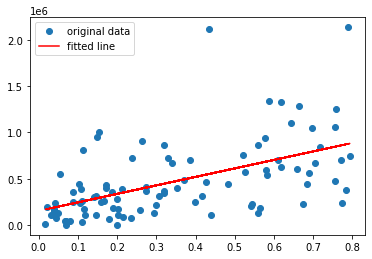

In [19]:
x = X['percent_empregos_destino']
plt.plot(x, y, 'o', label='original data')

plt.plot(x, res.params['const'] + 
         res.params['percent_empregos_destino']*x, 
         'r', label='fitted line')

plt.legend()

plt.show()

In [21]:
print(res.pvalues)

percent_empregos_destino    1.105938e-08
const                       1.538882e-02
dtype: float64


In [23]:
res.params

percent_empregos_destino    918667.522723
const                       152179.171732
dtype: float64